# Hearing Test Classification

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d prasenjitsharma/hearing-test-classification-problem

Dataset URL: https://www.kaggle.com/datasets/prasenjitsharma/hearing-test-classification-problem
License(s): unknown
  0%|                                               | 0.00/18.7k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 607kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Hearing Test Classification/hearing-test-classification-problem.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Hearing Test Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("hearing_test.csv")

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [7]:
df.shape

(5000, 3)

In [8]:
df.size

15000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [11]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1470)

In [13]:
df.nunique()

age                69
physical_score    404
test_result         2
dtype: int64

In [14]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

## Data Visualization

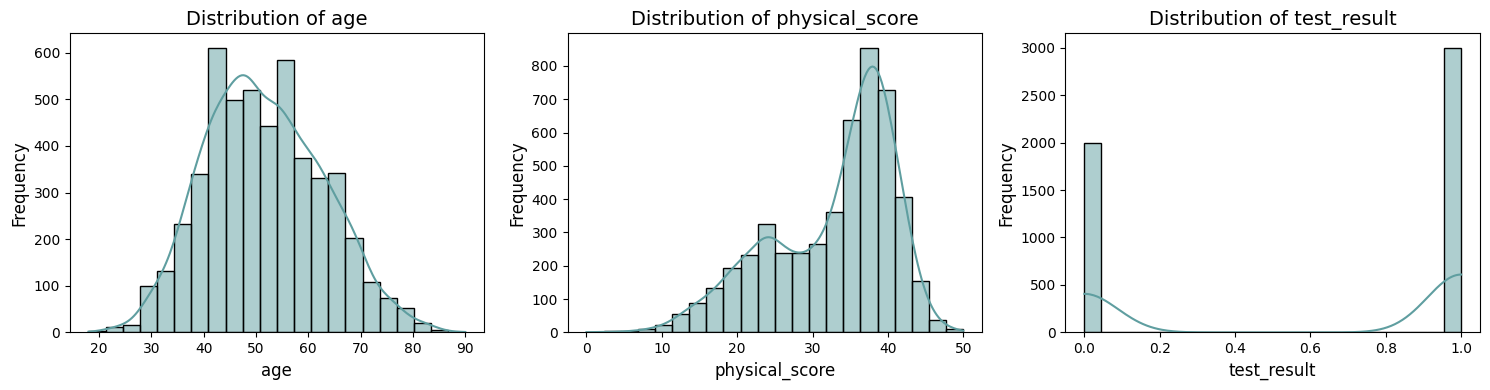

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

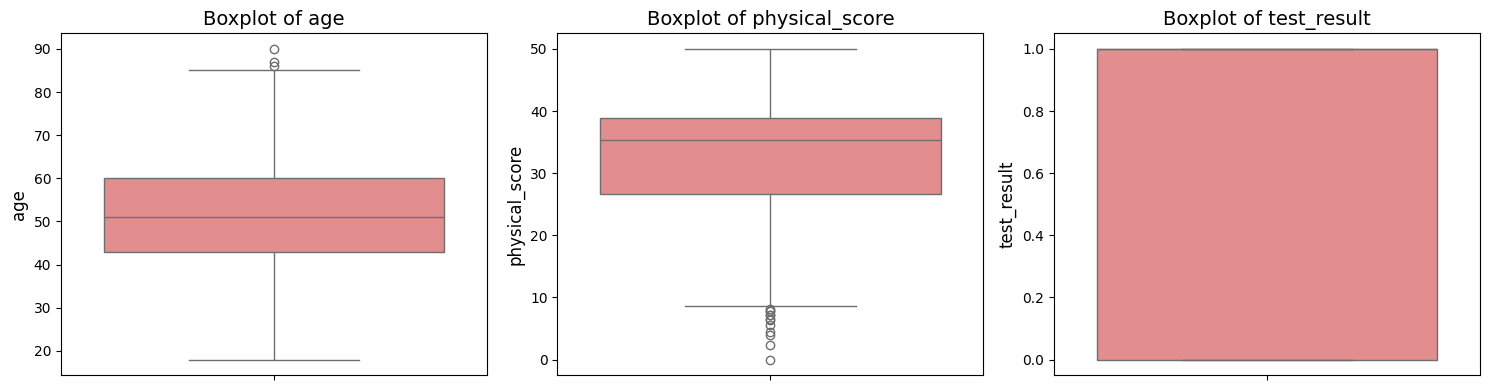

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

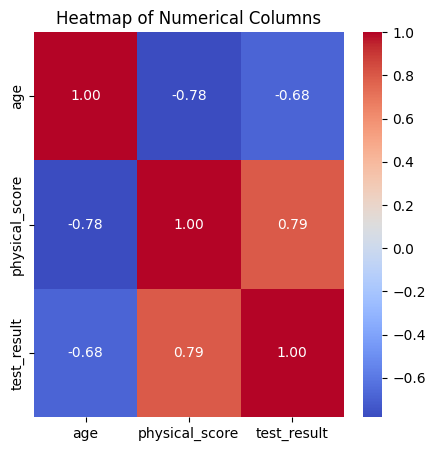

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [19]:
X = df.drop(columns=['test_result'])
y = df['test_result']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8937677053824362, 0.9079320113314447, 0.8923512747875354, 0.8526912181303116, 0.9008498583569405, 0.9121813031161473, 0.8555240793201133, 0.830028328611898, 0.9135977337110481]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       327
           1       0.90      0.90      0.90       379

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

Confusion Matrix:
 [[289  38]
 [ 37 342]]


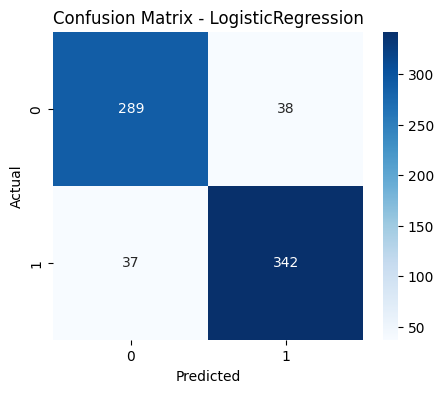

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       327
           1       0.89      0.94      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[284  43]
 [ 22 357]]


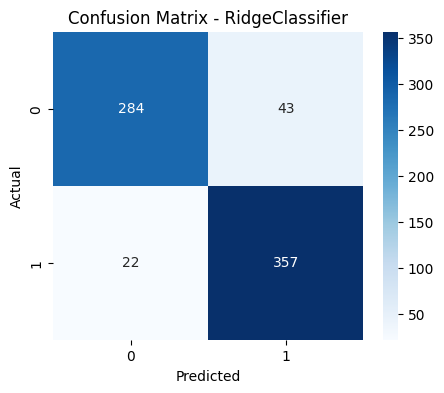

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       327
           1       0.90      0.91      0.90       379

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

Confusion Matrix:
 [[287  40]
 [ 36 343]]


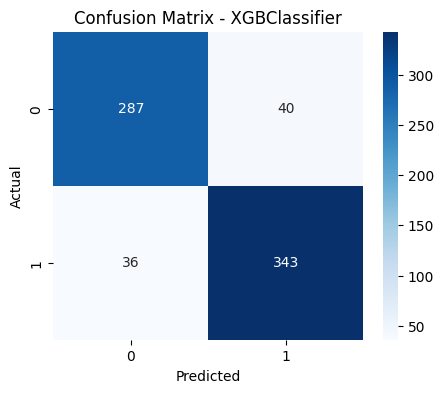

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       327
           1       0.88      0.84      0.86       379

    accuracy                           0.86       706
   macro avg       0.85      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Confusion Matrix:
 [[284  43]
 [ 59 320]]


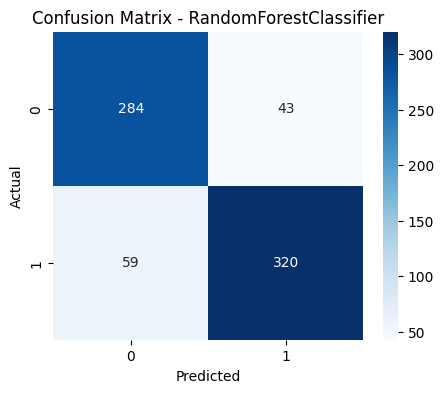

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       327
           1       0.88      0.95      0.91       379

    accuracy                           0.90       706
   macro avg       0.91      0.90      0.90       706
weighted avg       0.90      0.90      0.90       706

Confusion Matrix:
 [[276  51]
 [ 19 360]]


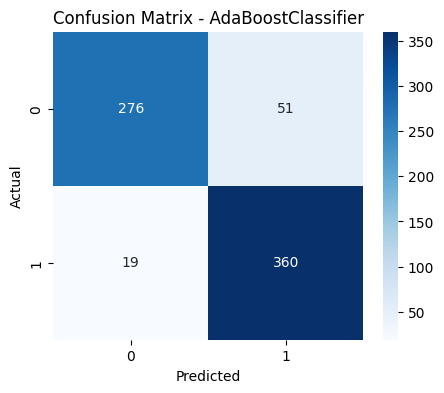

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       327
           1       0.91      0.93      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[290  37]
 [ 25 354]]


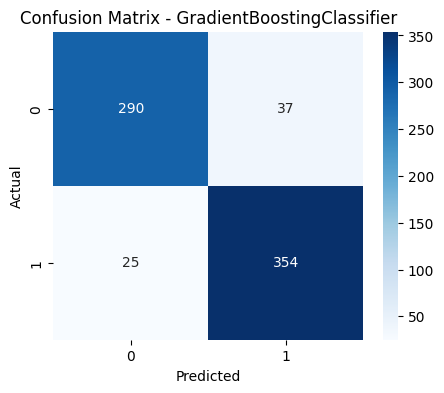

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       327
           1       0.88      0.83      0.85       379

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

Confusion Matrix:
 [[284  43]
 [ 65 314]]


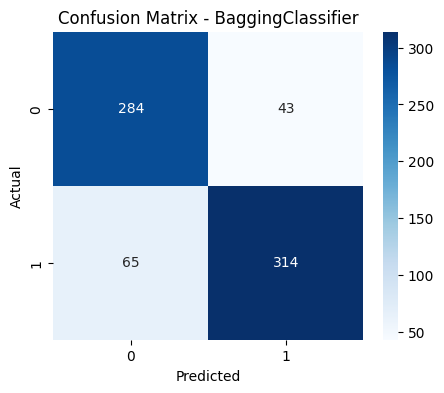

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       327
           1       0.87      0.81      0.84       379

    accuracy                           0.83       706
   macro avg       0.83      0.83      0.83       706
weighted avg       0.84      0.83      0.83       706

Confusion Matrix:
 [[281  46]
 [ 72 307]]


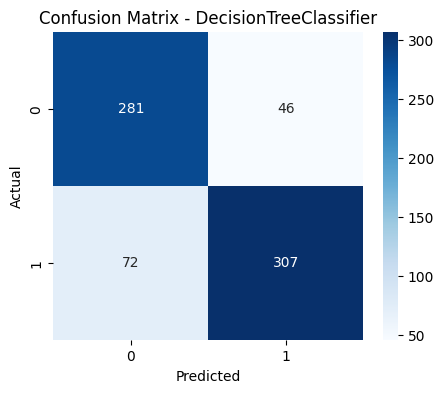

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       327
           1       0.90      0.94      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[289  38]
 [ 23 356]]


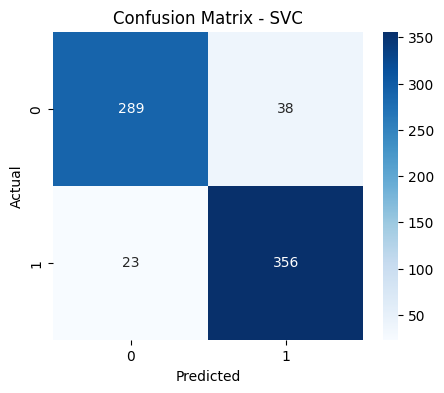

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()